In [1]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df_final_web_data_1 = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_web_data_pt_1.txt')

In [3]:
df_final_web_data_2 = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_web_data_pt_2.txt')

In [4]:
df_final_web_data_2.rename(columns = {'client_id':'Client ID', 'visitor_id':'Visitor ID', 'visit_id':'Visit ID', 'process_step':'Process Step', 'date_time':'Date/Time'}, inplace=True)

In [5]:
df_final_web_data_1.rename(columns = {'client_id':'Client ID', 'visitor_id':'Visitor ID', 'visit_id':'Visit ID', 'process_step':'Process Step', 'date_time':'Date/Time'}, inplace=True)

In [6]:
df_final_web_data_1

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [7]:
df_final_web_data_2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


# Unir DFs

In [8]:
dfjunto = pd.concat([df_final_web_data_1, df_final_web_data_2])

In [9]:
dfjunto

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [10]:
df_cambio = df_final_web_data_1
# Asegúrate de que la columna está en formato datetime
df_final_web_data_1['Date/Time'] = pd.to_datetime(df_final_web_data_1['Date/Time'])

# Crear nuevas columnas para la fecha y la hora
df_final_web_data_1['Date'] = df_final_web_data_1['Date/Time'].dt.date
df_final_web_data_1['Time'] = df_final_web_data_1['Date/Time'].dt.time

# Ver el DataFrame resultante
df_cambio

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04
...,...,...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46,2017-03-31,15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53,2017-03-31,15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08,2017-03-31,15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37,2017-03-31,15:11:37


In [11]:
df_cambio

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04
...,...,...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46,2017-03-31,15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53,2017-03-31,15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08,2017-03-31,15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37,2017-03-31,15:11:37


In [12]:
df_cambio.describe(include='object')

,Visitor ID,Visit ID,Process Step,Date,Time
count,343141,343141,343141,343141,343141
unique,62936,75256,5,47,69844
top,699275239_82397698587,712824876_8175482950_365042,start,2017-03-29,11:16:13
freq,66,61,108910,45798,38


In [13]:
df_cambio.describe(include='number')

,Client ID
count,3.431410e+05
mean,4.996097e+06
std,2.875839e+06
min,1.690000e+02
25%,2.506067e+06
50%,5.007915e+06
75%,7.468519e+06
max,9.999839e+06


In [14]:
unique_clients_per_step = df_cambio.groupby('Process Step')['Client ID'].nunique()
unique_clients_per_step1 = pd.DataFrame(unique_clients_per_step)
unique_clients_per_step1


,Client ID
Process Step,
confirm,37190
start,57851
step_1,49341
step_2,45385
step_3,42313


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_50846/2916662922.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step1, x='Process Step', y='Unique Client Count', palette="Set3")


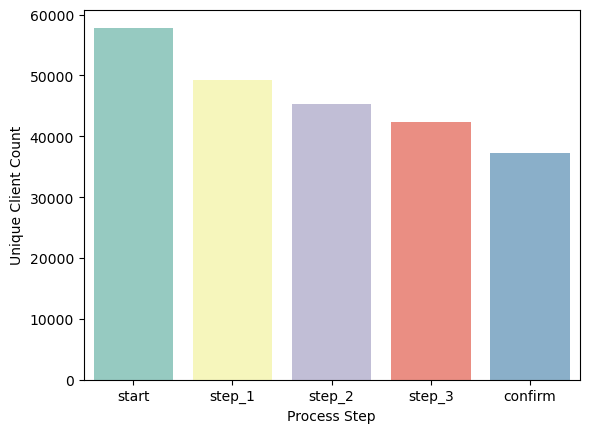

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step = df_cambio.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step1 = unique_clients_per_step.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step1.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que 'start' esté al final
order = [ 'start', 'step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step1['Process Step'] = pd.Categorical(unique_clients_per_step1['Process Step'], categories=order, ordered=True)
unique_clients_per_step1 = unique_clients_per_step1.sort_values('Process Step')

# Crear el gráfico de barras
sns.barplot(data=unique_clients_per_step1, x='Process Step', y='Unique Client Count', palette="Set3")

# Mostrar el gráfico
plt.show()


- Numero de clientes unicos q han pasado por cada paso

# DROP RATE

  Process Step  Unique Client Count  Drop Rate
1        start                57851   0.147102
2       step_1                49341   0.080177
3       step_2                45385   0.067688
4       step_3                42313   0.121074


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_50846/2477482566.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step1, x='Process Step', y='Drop Rate', palette="Set3")


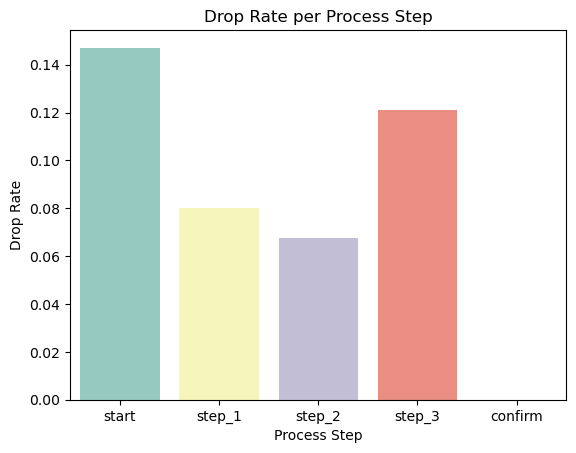

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step = df_cambio.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step1 = unique_clients_per_step.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step1.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que 'start' esté al final
order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step1['Process Step'] = pd.Categorical(unique_clients_per_step1['Process Step'], categories=order, ordered=True)
unique_clients_per_step1 = unique_clients_per_step1.sort_values('Process Step')

# Calcular el drop rate
unique_clients_per_step1['Drop Rate'] = unique_clients_per_step1['Unique Client Count'].diff(-1) / unique_clients_per_step1['Unique Client Count']

# Eliminar la última fila porque no tiene un paso siguiente para calcular el drop rate
unique_clients_per_step1 = unique_clients_per_step1[:-1]

# Imprimir los valores intermedios
print(unique_clients_per_step1)

# Crear el gráfico de barras para el drop rate
sns.barplot(data=unique_clients_per_step1, x='Process Step', y='Drop Rate', palette="Set3")

# Mostrar el gráfico
plt.title('Drop Rate per Process Step')
plt.ylabel('Drop Rate')
plt.xlabel('Process Step')
plt.show()


- start: El "Drop Rate" para 'start' parece ser el más alto, alrededor del 14%. Esto indica que el 14% de los clientes que inician el proceso abandonan en esta etapa.

- step_1: Tiene un "Drop Rate" más bajo en comparación con 'start', lo que sugiere que una parte de los clientes abandonan el proceso después de 'start'.

- step_2: La tasa de abandono disminuye aún más en 'step_2', lo que muestra una tendencia a que menos clientes abandonen a medida que avanzan en el proceso.

- step_3: Se observa un aumento en el "Drop Rate", lo que indica que más clientes abandonan en esta etapa.

- confirm: No tiene una barra, lo que significa que no hay un siguiente paso para calcular la tasa de abandono desde 'confirm'.


### CONVERSION RATE

In [17]:
# Agrupar los datos por 'Process Step' y contar clientes únicos
unique_clients_per_step1 = df_cambio.groupby('Process Step')['Client ID'].nunique().reset_index()
unique_clients_per_step1.rename(columns={'Client ID': 'Unique Client Count'}, inplace=True)

# Extraer los conteos para 'start' y 'confirm'
start_count = unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'start']['Unique Client Count']
confirm_count = unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'confirm']['Unique Client Count']

# Verificar que ambos conteos existan y no sean cero
if not start_count.empty and not confirm_count.empty and start_count.values[0] > 0:
    conversion_rate = confirm_count.values[0] / start_count.values[0]
    print(f"Conversion Rate: {conversion_rate:.2%}")
else:
    print("No data available for one or both process steps or start count is zero.")


Conversion Rate: 64.29%


In [18]:
df_cambio['Process Step'].value_counts()

Process Step
start      108910
step_1      73432
step_2      61768
step_3      53628
confirm     45403
Name: count, dtype: int64

In [19]:
df = df_cambio

# Convertir 'Date/Time' a tipo datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Ordenar por 'Client ID', 'Visitor ID', 'Visit ID' y 'Date/Time'
df.sort_values(by=['Client ID', 'Visitor ID', 'Visit ID', 'Date/Time'], inplace=True)

# Calcular la diferencia de tiempo entre pasos consecutivos
df['Time Diff'] = df.groupby(['Client ID', 'Visitor ID', 'Visit ID'])['Date/Time'].diff()

# Filtrar las diferencias de tiempo entre pasos del proceso
# En este caso, necesitamos las diferencias entre 'step_1', 'step_2', 'step_3', etc.
df_steps = df

# Mostrar resultados
df_steps[['Client ID', 'Visitor ID', 'Visit ID', 'Process Step', 'Date', 'Time', 'Time Diff']]

,Client ID,Visitor ID,Visit ID,Process Step,Date,Time,Time Diff
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12,20:19:36,NaT
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12,20:19:45,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12,20:20:31,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12,20:22:05,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12,20:23:09,0 days 00:01:04
...,...,...,...,...,...,...,...
274435,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29,12:11:32,0 days 00:02:37
274434,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29,12:11:35,0 days 00:00:03
274433,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29,12:11:50,0 days 00:00:15
274432,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29,12:12:28,0 days 00:00:38


# Average time per step

In [20]:
average_time_per_step = df_cambio.groupby('Process Step')['Time Diff'].mean()
average_time_per_step

Process Step
confirm   0 days 00:02:12.752938941
start     0 days 00:02:45.205762179
step_1    0 days 00:00:41.662630376
step_2    0 days 00:00:44.440472702
step_3    0 days 00:01:33.367231638
Name: Time Diff, dtype: timedelta64[ns]

# Funnel

In [21]:
funnel = unique_clients_per_step1.set_index('Process Step').reindex(order)['Unique Client Count']
funnel

Process Step
start      57851
step_1     49341
step_2     45385
step_3     42313
confirm    37190
Name: Unique Client Count, dtype: int64

- Number of clients in each step. 

# Bounce Rate

In [22]:
bounce_rate = (unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'start']['Unique Client Count'].values[0] - 
               unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'step_1']['Unique Client Count'].values[0])/unique_clients_per_step1[unique_clients_per_step1['Process Step'] == 'start']['Unique Client Count'].values[0]
print(f"Bounce Rate: {bounce_rate:.2%}")

Bounce Rate: 14.71%


- Porcentaje de personas q abandonan el proceso en el primer paso.

# Unir DFs

In [23]:
df_final_web_data_2 = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_web_data_pt_2.txt')

In [24]:
df_final_web_data_2.rename(columns = {'client_id':'Client ID', 'visitor_id':'Visitor ID', 'visit_id':'Visit ID', 'process_step':'Process Step', 'date_time':'Date/Time'}, inplace=True)

In [25]:

# Asegúrate de que la columna está en formato datetime
df_final_web_data_2['Date/Time'] = pd.to_datetime(df_final_web_data_2['Date/Time'])

# Crear nuevas columnas para la fecha y la hora
df_final_web_data_2['Date'] = df_final_web_data_2['Date/Time'].dt.date
df_final_web_data_2['Time'] = df_final_web_data_2['Date/Time'].dt.time

# Ver el DataFrame resultante
df_final_web_data_2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00,2017-06-06,08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27,2017-06-01,11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48,2017-06-01,11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08,2017-06-01,11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58,2017-06-01,11:57:58
...,...,...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34


In [26]:
df = df_final_web_data_2

# Convertir 'Date/Time' a tipo datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Ordenar por 'Client ID', 'Visitor ID', 'Visit ID' y 'Date/Time'
df.sort_values(by=['Client ID', 'Visitor ID', 'Visit ID', 'Date/Time'], inplace=True)

# Calcular la diferencia de tiempo entre pasos consecutivos
df['Time Diff'] = df.groupby(['Client ID', 'Visitor ID', 'Visit ID'])['Date/Time'].diff()

# Filtrar las diferencias de tiempo entre pasos del proceso
# En este caso, necesitamos las diferencias entre 'step_1', 'step_2', 'step_3', etc.
df_steps = df

# Mostrar resultados
df_steps[['Client ID', 'Visitor ID', 'Visit ID', 'Process Step', 'Date/Time', 'Date', 'Time', 'Time Diff']]

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55,2017-06-01,07:26:55,NaT
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43,2017-06-01,07:42:43,0 days 00:15:48
99716,546,475037402_89828530214,731811517_9330176838_94847,start,2017-06-17 10:03:29,2017-06-17,10:03:29,NaT
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39,2017-06-17,10:03:39,0 days 00:00:10
99714,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17 10:03:52,2017-06-17,10:03:52,0 days 00:00:13
...,...,...,...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01,22:40:08,0 days 00:00:07
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01,22:41:28,0 days 00:01:20
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01,22:41:47,0 days 00:00:19
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01,22:44:58,0 days 00:03:11


In [27]:
df_final_web_data_1

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,NaT
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,0 days 00:01:04
...,...,...,...,...,...,...,...,...
274435,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,2017-03-29,12:11:32,0 days 00:02:37
274434,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,2017-03-29,12:11:35,0 days 00:00:03
274433,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,2017-03-29,12:11:50,0 days 00:00:15
274432,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,2017-03-29,12:12:28,0 days 00:00:38


In [28]:
df_final_web_data_1

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,NaT
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,0 days 00:01:04
...,...,...,...,...,...,...,...,...
274435,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,2017-03-29,12:11:32,0 days 00:02:37
274434,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,2017-03-29,12:11:35,0 days 00:00:03
274433,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,2017-03-29,12:11:50,0 days 00:00:15
274432,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,2017-03-29,12:12:28,0 days 00:00:38


In [29]:
dfjunto2 = pd.concat([df_final_web_data_1, df_final_web_data_2])

In [31]:
dfjunto2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,NaT
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,0 days 00:01:04
...,...,...,...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01,22:40:08,0 days 00:00:07
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01,22:41:28,0 days 00:01:20
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01,22:41:47,0 days 00:00:19
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01,22:44:58,0 days 00:03:11
